# **SMC Projet : Robust Filtering** : Visuals

___

*Alice Lastate, Bastien Lecomte & Imane Mokhtatif*

___

**Based on the following paper :** Laurent E. Calvet, Veronika Czellar & Elvezio Ronchetti (2015) Robust
Filtering, Journal of the American Statistical Association, 110:512, 1591-1606, DOI:
10.1080/01621459.2014.983520 





### Imports : 

In [1]:
import numpy as np
from particles import state_space_models as ssm
from particles import distributions as dists
from particles import SMC
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
import os
import yfinance as yf
import pandas as pd


# Stochastic Volatility

In [2]:
from stochvol import StochVol, smoothing, robust_smoothing, generate_contaminated_data

### Data Generation & Visualisation

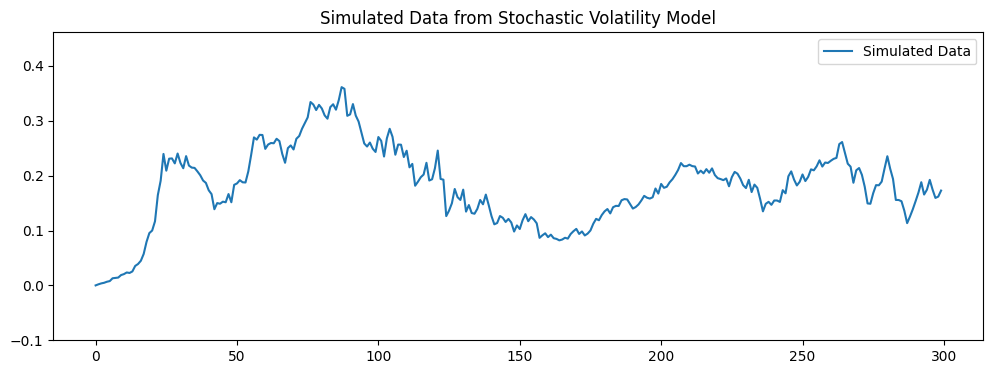

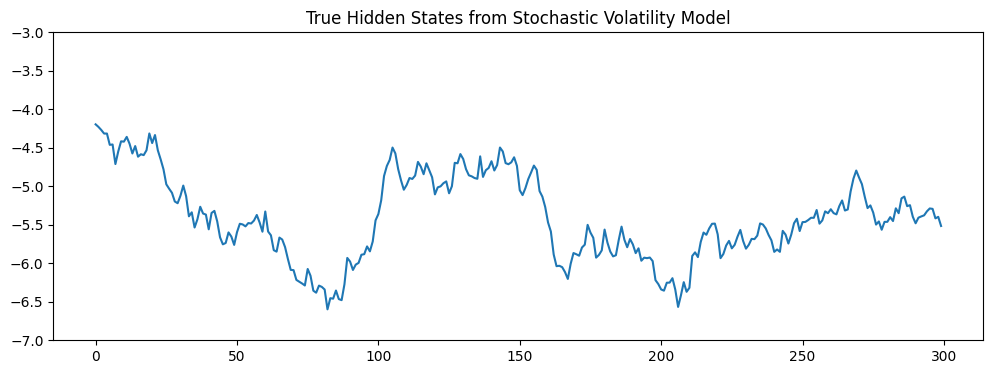

In [3]:
stochvolssm = StochVol()
true_states_sv, data_sim_sv = stochvolssm.simulate(300) 

plt.figure(figsize=(12, 4))
plt.ylim(data_sim_sv.min()-0.1, data_sim_sv.max()+0.1)
plt.plot(data_sim_sv, label='Simulated Data')
plt.title('Simulated Data from Stochastic Volatility Model')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.ylim(-7,-3)
plt.plot(true_states_sv)
plt.title('True Hidden States from Stochastic Volatility Model')
plt.show()

### Smoothing (PF)

In [4]:
smooth_traj_stochvol, upper_stochvol, lower_stochvol, percentage, model = smoothing(data_sim_sv, true_states_sv, N=1000, n=200)

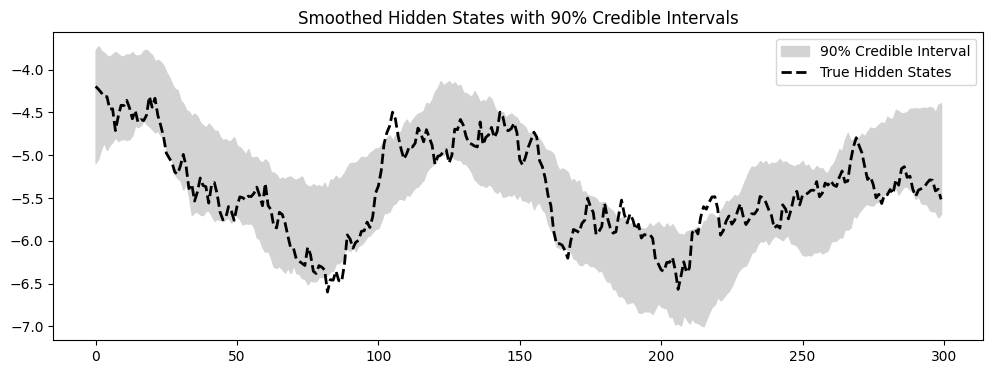

Percentage of true states within the 90% credible interval: 85.67%


In [5]:
plt.figure(figsize=(12, 4))
plt.fill_between(range(len(data_sim_sv)), lower_stochvol, upper_stochvol, color='lightgray', label='90% Credible Interval')
plt.plot(true_states_sv, 'k--', label='True Hidden States', linewidth=2)
plt.title('Smoothed Hidden States with 90% Credible Intervals')
plt.legend()
plt.show()

print(f"Percentage of true states within the 90% credible interval: {percentage:.2f}%")

### Smoothing (RobPF)

In [6]:
smooth_traj_stochvol_rob, upper_stochvol_rob, lower_stochvol_rob, percentage_rob, model_rob = robust_smoothing(data_sim_sv, true_states_sv, N=1000, n=200, c=5.14)


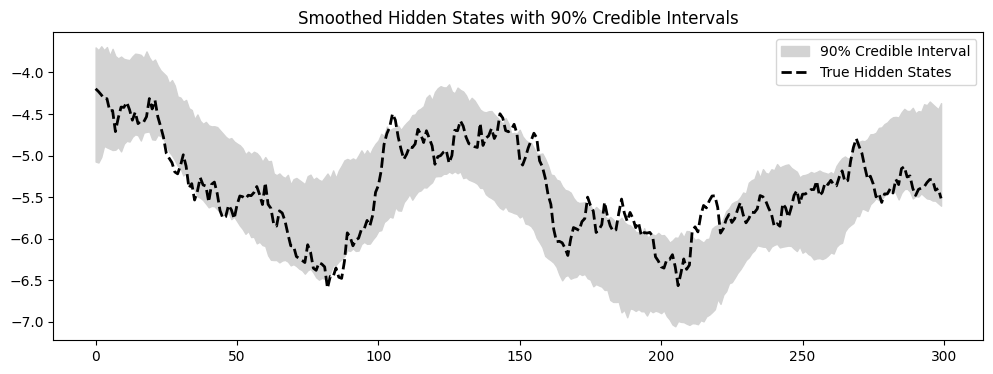

Percentage of true states within the 90% credible interval: 81.33%


In [7]:
plt.figure(figsize=(12, 4))

plt.fill_between(range(len(data_sim_sv)), lower_stochvol_rob, upper_stochvol_rob, color='lightgray', label='90% Credible Interval')
plt.plot(true_states_sv, 'k--', label='True Hidden States', linewidth=2)
plt.title('Smoothed Hidden States with 90% Credible Intervals')
plt.legend()
plt.show()

print(f"Percentage of true states within the 90% credible interval: {percentage_rob:.2f}%")

### Comparaison clean data : 

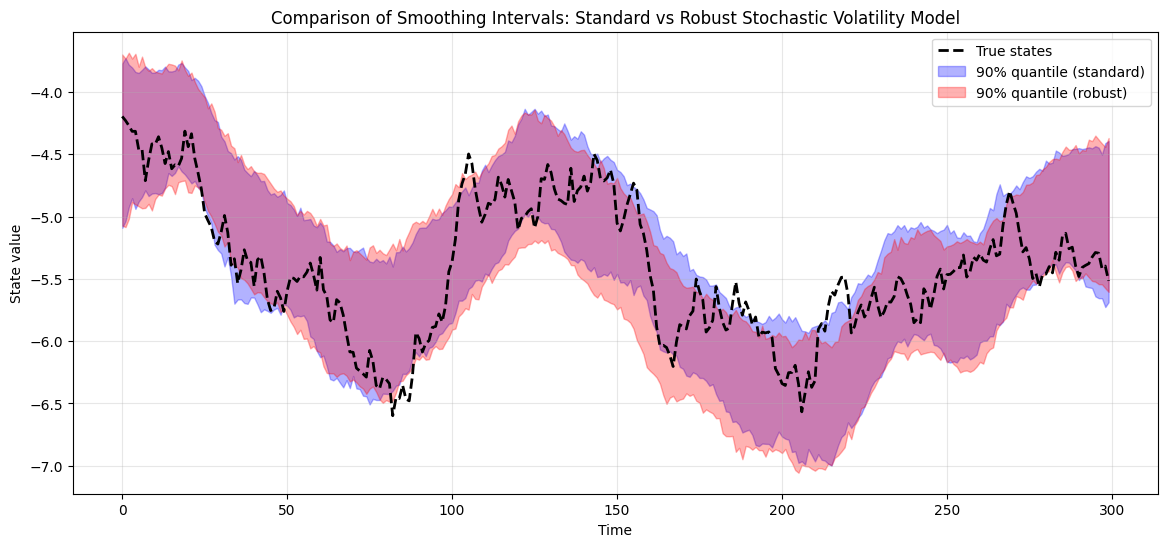

Standard Model Coverage: 85.67%, Robust Model Coverage: 81.33%


In [9]:
plt.figure(figsize=(14, 6))
plt.plot(true_states_sv, 'k--', linewidth=2, label='True states', zorder=3)
plt.fill_between(range(len(lower_stochvol)), lower_stochvol, upper_stochvol, color='blue', alpha=0.3, label='90% quantile (standard)')
plt.fill_between(range(len(lower_stochvol_rob)), lower_stochvol_rob, upper_stochvol_rob, color='red', alpha=0.3, label='90% quantile (robust)')
plt.title('Comparison of Smoothing Intervals: Standard vs Robust Stochastic Volatility Model')
plt.xlabel('Time')
plt.ylabel('State value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Standard Model Coverage: {percentage:.2f}%, Robust Model Coverage: {percentage_rob:.2f}%")

## Contaminated data : 

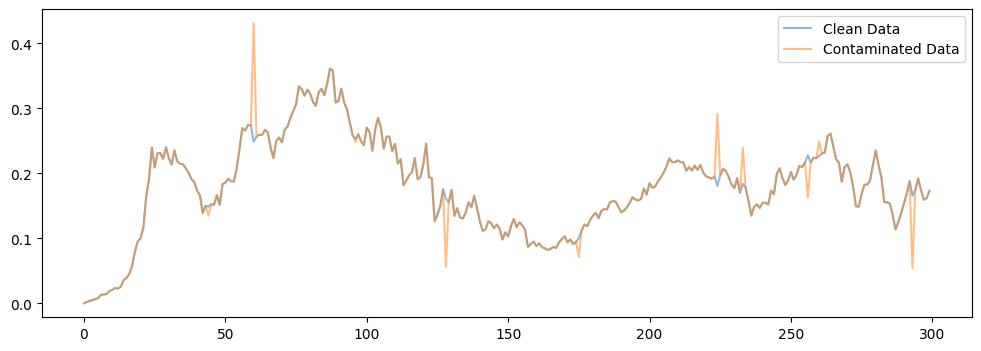

In [10]:
data_sim_sv_cont = generate_contaminated_data(data_sim_sv, alpha=0.002, beta=-0.001, contamination_rate=0.05, eta=10)

plt.figure(figsize=(12, 4))
plt.plot(data_sim_sv, label='Clean Data', alpha=0.5)
plt.plot(data_sim_sv_cont, label='Contaminated Data', alpha=0.5)
plt.legend()
plt.show()

### Smoothing (PF on contaminated data)

In [11]:
smooth_traj_stochvol_cont, upper_stochvol_cont, lower_stochvol_cont, percentage_cont, model_cont = smoothing(data_sim_sv_cont, true_states_sv, N=1000, n=200, model=model)

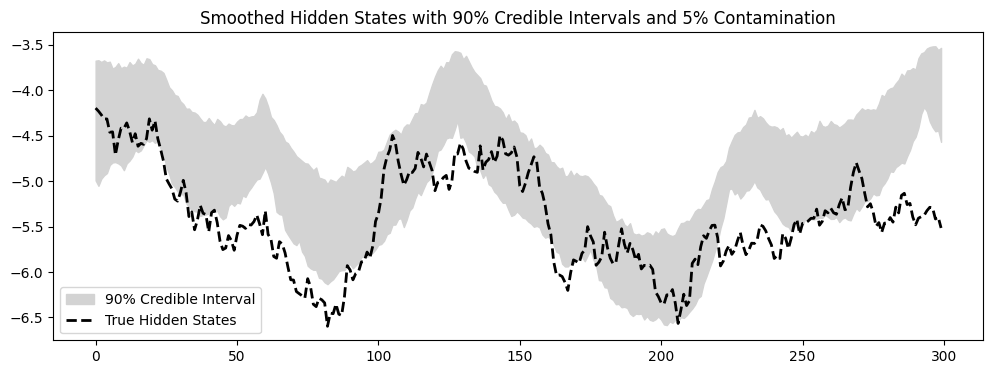

Percentage of true states within the 90% credible interval: 49.33%


In [12]:
plt.figure(figsize=(12, 4))
plt.fill_between(range(len(data_sim_sv_cont)), lower_stochvol_cont, upper_stochvol_cont, color='lightgray', label='90% Credible Interval')
plt.plot(true_states_sv, 'k--', label='True Hidden States', linewidth=2)
plt.title('Smoothed Hidden States with 90% Credible Intervals and 5% Contamination')
plt.legend()
plt.show()

print(f"Percentage of true states within the 90% credible interval: {percentage_cont:.2f}%")

### Smoothing (RobPF) on contaminated data

In [13]:
smooth_traj_stochvol_cont_rob, upper_stochvol_cont_rob, lower_stochvol_cont_rob, percentage_cont_rob, model_cont_rob = robust_smoothing(data_sim_sv_cont, true_states_sv, N=1000, n=200, c=5.14, model=model_rob)

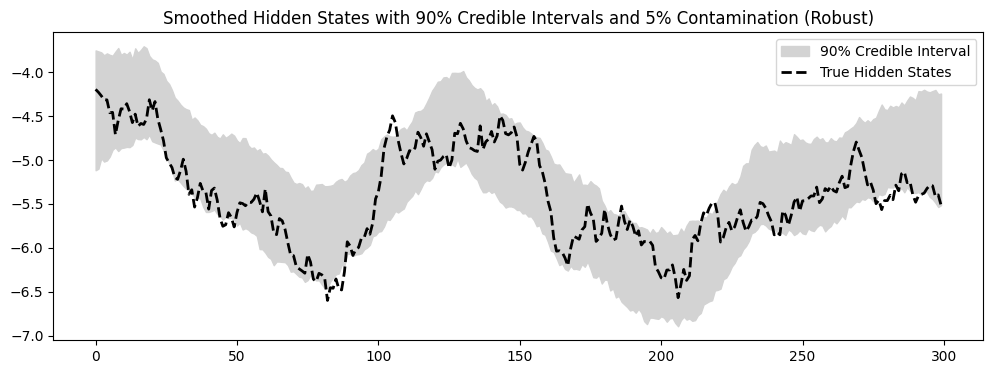

Percentage of true states within the 90% credible interval: 85.33%


In [14]:
plt.figure(figsize=(12, 4))
plt.fill_between(range(len(data_sim_sv_cont)), lower_stochvol_cont_rob, upper_stochvol_cont_rob, color='lightgray', label='90% Credible Interval')
plt.plot(true_states_sv, 'k--', label='True Hidden States', linewidth=2)
plt.title('Smoothed Hidden States with 90% Credible Intervals and 5% Contamination (Robust)')
plt.legend()
plt.show()

print(f"Percentage of true states within the 90% credible interval: {percentage_cont_rob:.2f}%")

### Comparison contaminated data : 

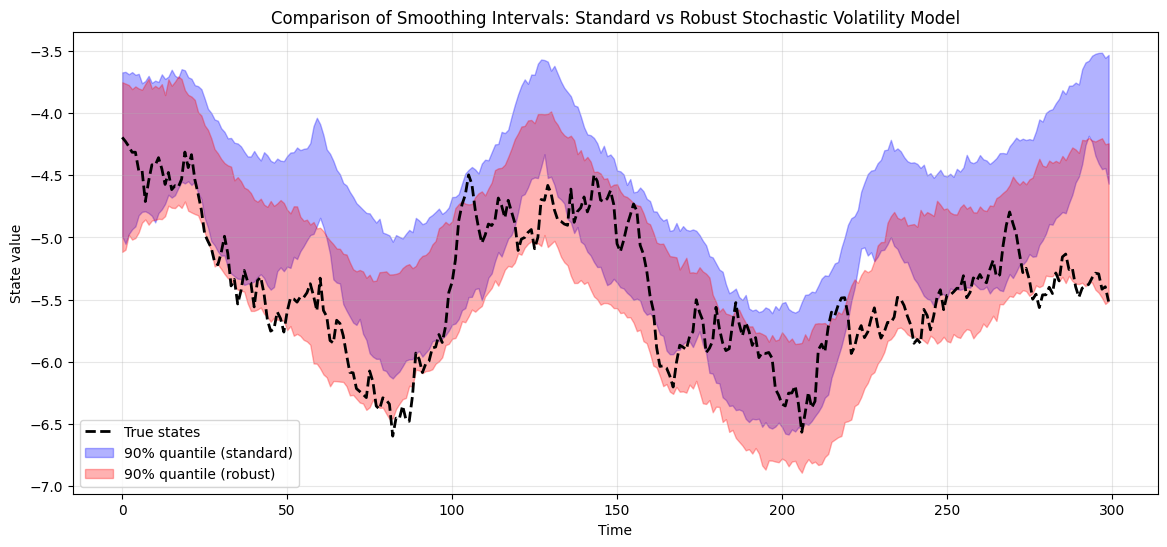

Standard Model Coverage: 49.33%, Robust Model Coverage: 85.33%


In [15]:
plt.figure(figsize=(14, 6))
plt.plot(true_states_sv, 'k--', linewidth=2, label='True states', zorder=3)
plt.fill_between(range(len(lower_stochvol_cont)), lower_stochvol_cont, upper_stochvol_cont, color='blue', alpha=0.3, label='90% quantile (standard)')
plt.fill_between(range(len(lower_stochvol_cont_rob)), lower_stochvol_cont_rob, upper_stochvol_cont_rob, color='red', alpha=0.3, label='90% quantile (robust)')
plt.title('Comparison of Smoothing Intervals: Standard vs Robust Stochastic Volatility Model')
plt.xlabel('Time')
plt.ylabel('State value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Standard Model Coverage: {percentage_cont:.2f}%, Robust Model Coverage: {percentage_cont_rob:.2f}%")

### Multiple experimentations

  0%|          | 0/10 [00:00<?, ?it/s]

Simulation 1/10...


 10%|█         | 1/10 [00:44<06:43, 44.81s/it]

Simulation 2/10...


 20%|██        | 2/10 [01:47<07:22, 55.33s/it]

Simulation 3/10...


 30%|███       | 3/10 [02:53<07:00, 60.08s/it]

Simulation 4/10...


 40%|████      | 4/10 [04:17<06:56, 69.47s/it]

Simulation 5/10...


 50%|█████     | 5/10 [05:56<06:41, 80.22s/it]

Simulation 6/10...


 60%|██████    | 6/10 [07:08<05:09, 77.30s/it]

Simulation 7/10...


 70%|███████   | 7/10 [07:49<03:17, 65.69s/it]

Simulation 8/10...


 80%|████████  | 8/10 [08:50<02:08, 64.24s/it]

Simulation 9/10...


 90%|█████████ | 9/10 [09:39<00:59, 59.20s/it]

Simulation 10/10...


100%|██████████| 10/10 [11:02<00:00, 66.24s/it]
C:\Users\conta\AppData\Local\Temp\ipykernel_8828\512991692.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([results['clean_pf'], results['clean_robpf']],
C:\Users\conta\AppData\Local\Temp\ipykernel_8828\512991692.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([results['contaminated_pf'], results['contaminated_robpf']],



RESULTS SUMMARY

Clean Data:
  PF:     Mean = 89.20%, Std = 5.76%
  RobPF:  Mean = 90.53%, Std = 5.64%

Contaminated Data (5.0% contamination):
  PF:     Mean = 55.97%, Std = 8.84%
  RobPF:  Mean = 85.60%, Std = 8.04%


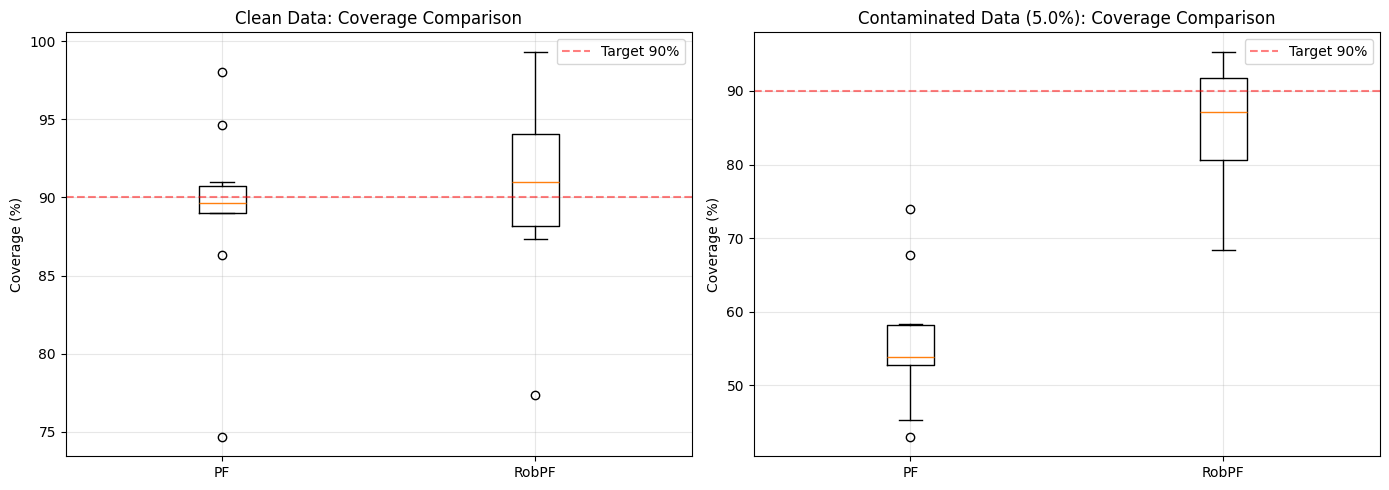

In [32]:
n_simulations = 10
contamination_rate = 0.05

results = {
    'clean_pf': [],
    'clean_robpf': [],
    'contaminated_pf': [],
    'contaminated_robpf': []
}

for i in tqdm(range(n_simulations)):
    print(f"Simulation {i+1}/{n_simulations}...")

    true_states, clean_data = stochvolssm.simulate(300)
    _, _, _, perc_clean_pf, model_pf = smoothing(clean_data, true_states, N=1000, n=200)
    results['clean_pf'].append(perc_clean_pf)

    _, _, _, perc_clean_robpf, model_robpf = robust_smoothing(clean_data, true_states, N=1000, n=200, c=5.14)
    results['clean_robpf'].append(perc_clean_robpf)
    
    contaminated_data = generate_contaminated_data(clean_data, alpha=0.002, beta=-0.001, 
                                                   contamination_rate=contamination_rate, eta=10)
    
    _, _, _, perc_cont_pf, _ = smoothing(contaminated_data, true_states, N=1000, n=200, model=model_pf)
    results['contaminated_pf'].append(perc_cont_pf)
    
    _, _, _, perc_cont_robpf, _ = robust_smoothing(contaminated_data, true_states, N=1000, n=200, c=5.14, model=model_robpf)
    results['contaminated_robpf'].append(perc_cont_robpf)

for key in results:
    results[key] = np.array(results[key])

print("\n" + "="*60)
print("RESULTS SUMMARY")
print("="*60)
print("\nClean Data:")
print(f"  PF:     Mean = {results['clean_pf'].mean():.2f}%, Std = {results['clean_pf'].std():.2f}%")
print(f"  RobPF:  Mean = {results['clean_robpf'].mean():.2f}%, Std = {results['clean_robpf'].std():.2f}%")

print(f"\nContaminated Data ({contamination_rate*100}% contamination):")
print(f"  PF:     Mean = {results['contaminated_pf'].mean():.2f}%, Std = {results['contaminated_pf'].std():.2f}%")
print(f"  RobPF:  Mean = {results['contaminated_robpf'].mean():.2f}%, Std = {results['contaminated_robpf'].std():.2f}%")


# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Clean data comparison
axes[0].boxplot([results['clean_pf'], results['clean_robpf']], 
                labels=['PF', 'RobPF'])
axes[0].set_ylabel('Coverage (%)')
axes[0].set_title('Clean Data: Coverage Comparison')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=90, color='r', linestyle='--', alpha=0.5, label='Target 90%')
axes[0].legend()

# Contaminated data comparison
axes[1].boxplot([results['contaminated_pf'], results['contaminated_robpf']], 
                labels=['PF', 'RobPF'])
axes[1].set_ylabel('Coverage (%)')
axes[1].set_title(f'Contaminated Data ({contamination_rate*100}%): Coverage Comparison')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=90, color='r', linestyle='--', alpha=0.5, label='Target 90%')
axes[1].legend()

plt.tight_layout()
plt.show()

# Robust density

In [ ]:
from robust_dist import plot_robust_vs_normal

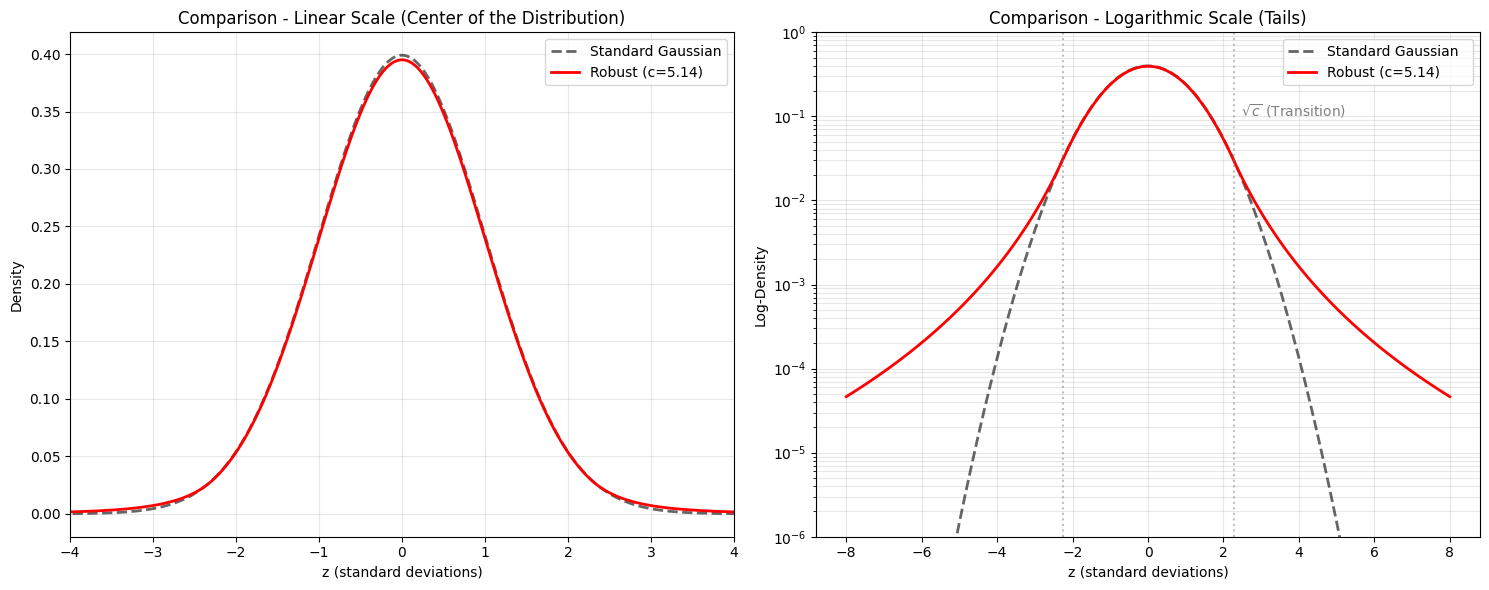

In [ ]:
# c = 5.14 is the parameter used in the paper, cf table 1 in section 3.5
plot_robust_vs_normal(c=5.14)

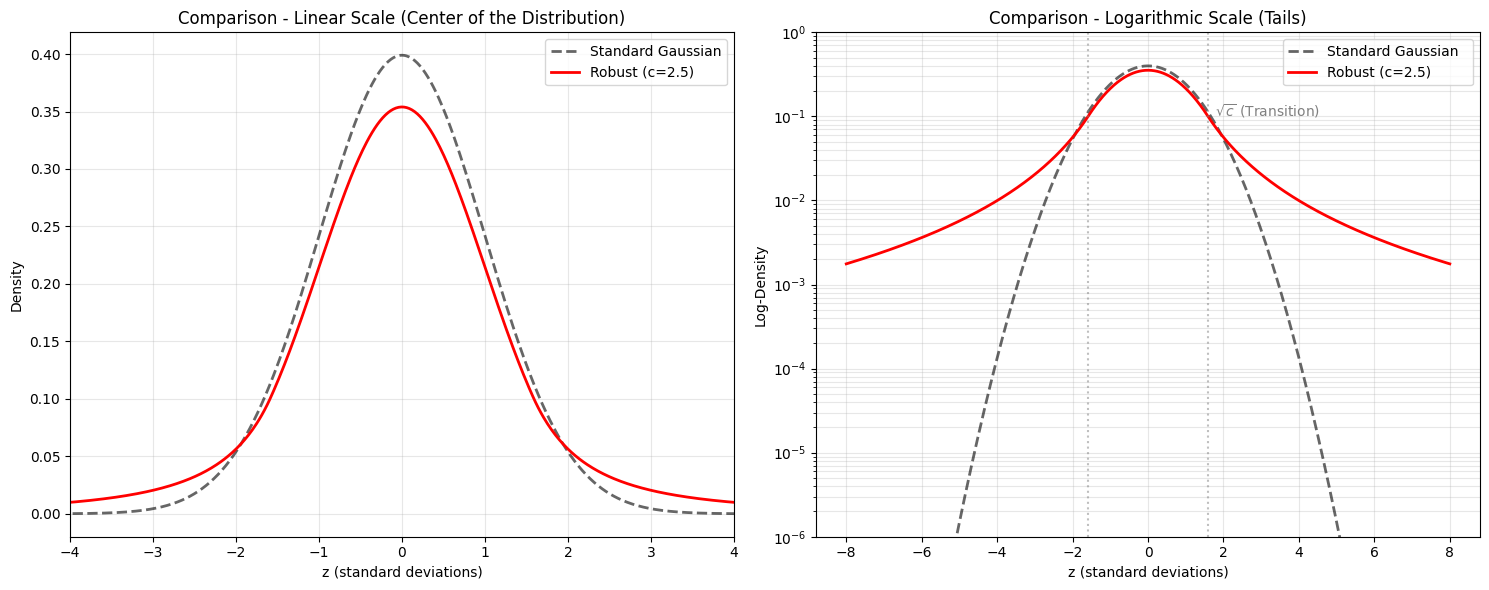

In [3]:
plot_robust_vs_normal(c=2.5)

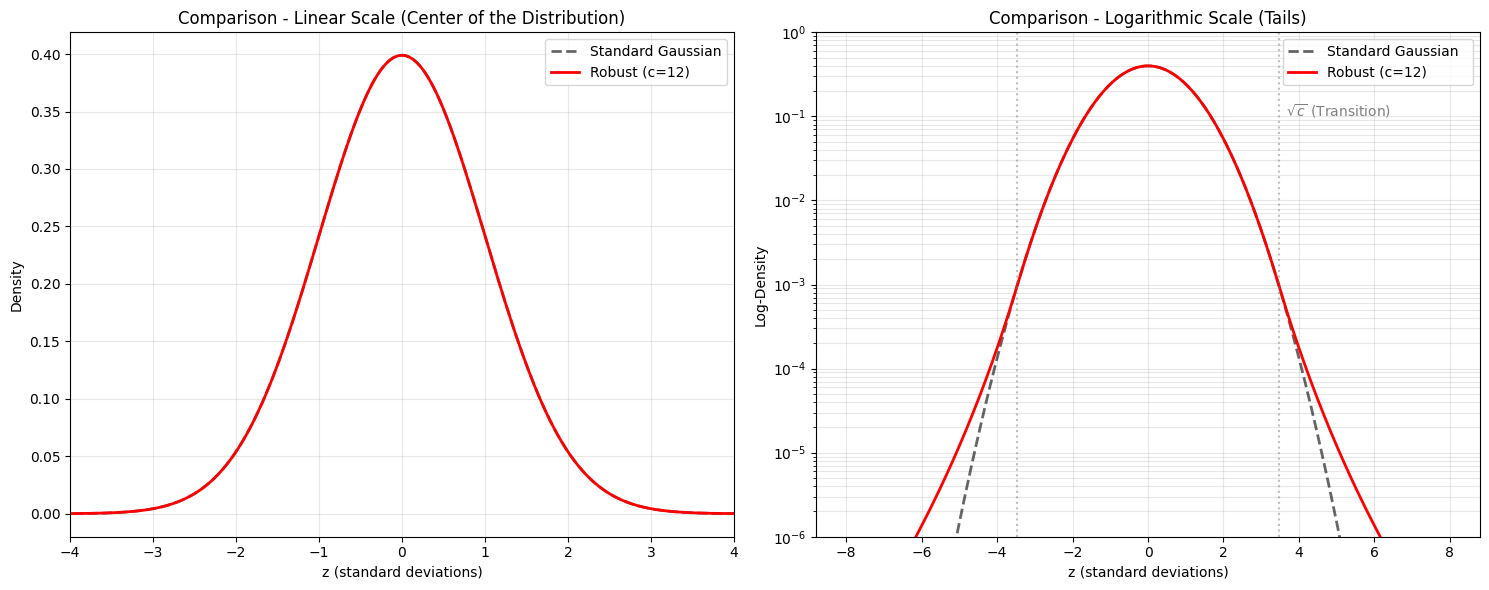

In [8]:
plot_robust_vs_normal(c=12)

# Daily Trading Volume (Mock data)

## Data generation and visualisation

In [18]:
from daily_trad_vol import DailyTradVol, DailyTradVolRobust

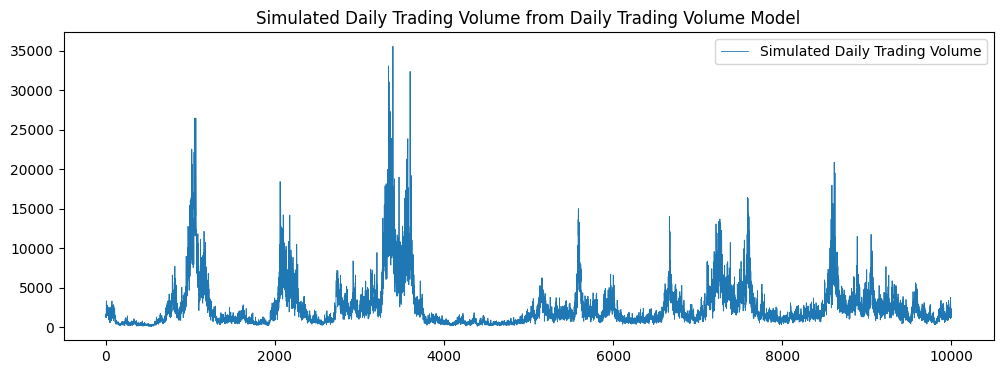

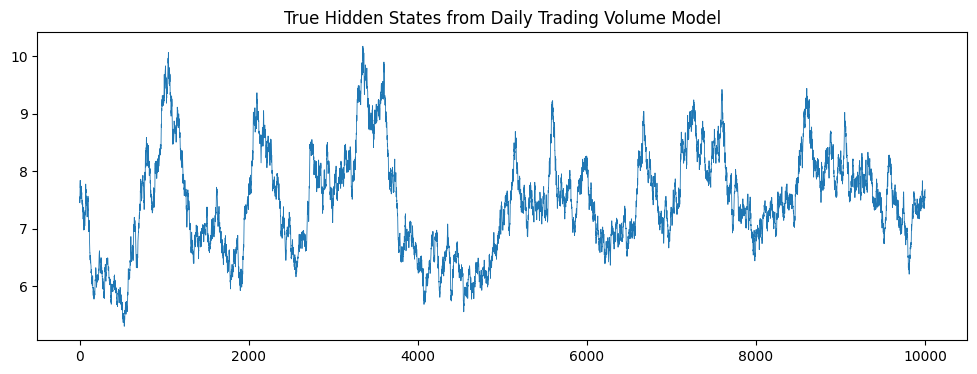

In [19]:
DailyTradVolssm = DailyTradVol()
true_states, data = DailyTradVolssm.simulate(10000)

fig = plt.figure(figsize=(12, 4))
plt.plot(np.exp(data), label='Simulated Daily Trading Volume', linewidth=0.6)
plt.title('Simulated Daily Trading Volume from Daily Trading Volume Model')
plt.legend()
plt.show()

fig = plt.figure(figsize=(12, 4))
plt.plot(true_states, label='True Hidden States', linewidth=0.6)
plt.title('True Hidden States from Daily Trading Volume Model')
plt.show()


### Contaminated data :


In [20]:
from daily_trad_vol import contaminate_trading_volume

In [21]:
data_cont = contaminate_trading_volume(data, true_states, sigma_y=0.3, rate=0.05, eta=14)

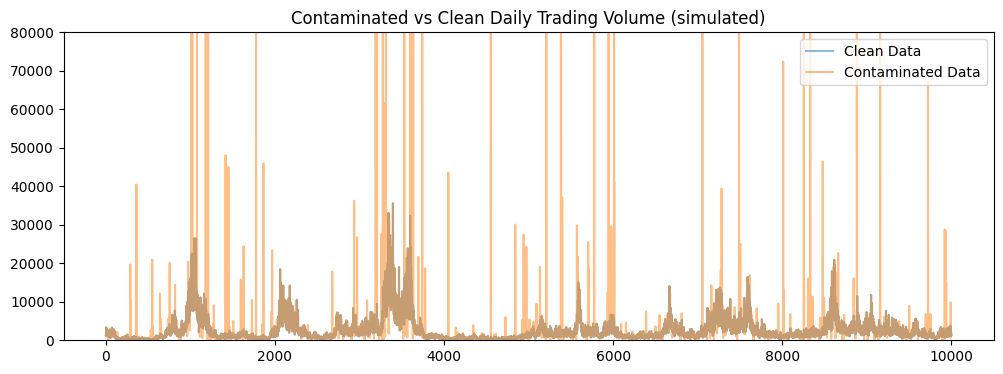

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(np.exp(data), label='Clean Data', alpha=0.5)
plt.plot(np.exp(data_cont), label='Contaminated Data', alpha=0.5)
plt.ylim(0, 80000)
plt.title('Contaminated vs Clean Daily Trading Volume (simulated)')
plt.legend(loc='upper right')
plt.show()

## ESS

In [23]:
from daily_trad_vol import get_ess_ratio, get_ess_prop_eta

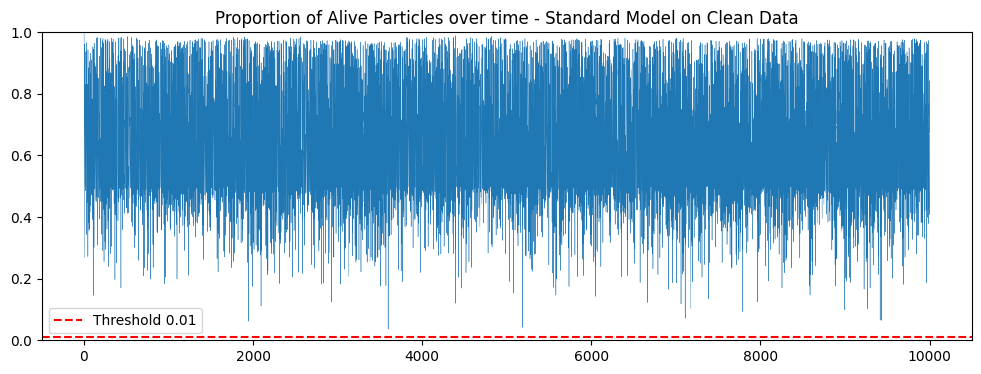

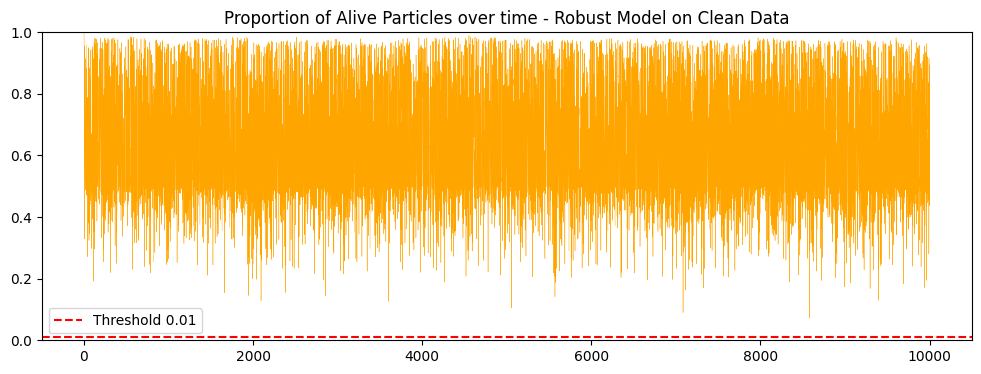

Proportion of alive particles below 0.01 - Standard Model: 0.0000%
Proportion of alive particles below 0.01 - Robust Model: 0.0000%


In [27]:
ess_ratio_std, prop_below_thres_std = get_ess_ratio(data, c=1000, N=1000, thres=0.01)
plt.figure(figsize=(12, 4))
plt.plot(ess_ratio_std, linewidth=0.3)
plt.title('Proportion of Alive Particles over time - Standard Model on Clean Data')
plt.axhline(y=0.01, color='r', linestyle='--', alpha=1, label='Threshold 0.01')
plt.ylim(0, 1)
plt.legend()
plt.show()

ess_ratio_rob, prop_below_thres_rob = get_ess_ratio(data_cont, c=5.14, N=1000, thres=0.01)
plt.figure(figsize=(12, 4))
plt.plot(ess_ratio_rob, linewidth=0.3, color='orange')
plt.title('Proportion of Alive Particles over time - Robust Model on Clean Data')
plt.axhline(y=0.01, color='r', linestyle='--', alpha=1, label='Threshold 0.01')
plt.ylim(0, 1)
plt.legend()
plt.show()

print(f"Proportion of alive particles below 0.01 - Standard Model: {prop_below_thres_std:.4f}%")
print(f"Proportion of alive particles below 0.01 - Robust Model: {prop_below_thres_rob:.4f}%")

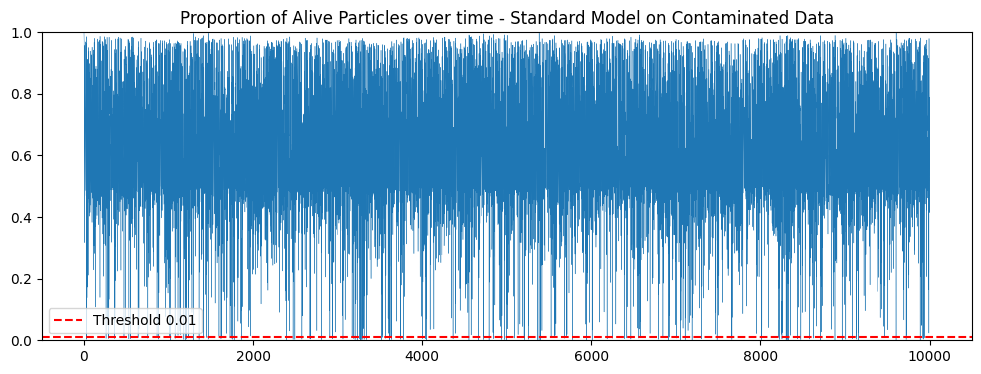

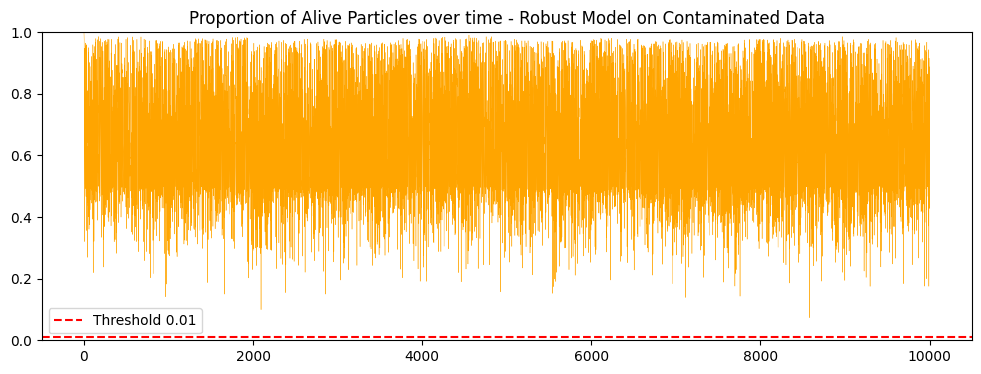

Proportion of alive particles below 0.01 - Standard Model: 0.0129%
Proportion of alive particles below 0.01 - Robust Model: 0.0000%


In [26]:
ess_ratio_std, prop_below_thres_std = get_ess_ratio(data_cont, c=1000, N=1000, thres=0.01)
plt.figure(figsize=(12, 4))
plt.plot(ess_ratio_std, linewidth=0.3)
plt.title('Proportion of Alive Particles over time - Standard Model on Contaminated Data')
plt.axhline(y=0.01, color='r', linestyle='--', alpha=1, label='Threshold 0.01')
plt.ylim(0, 1)
plt.legend()
plt.show()

ess_ratio_rob, prop_below_thres_rob = get_ess_ratio(data_cont, c=5.14, N=1000, thres=0.01)
plt.figure(figsize=(12, 4))
plt.plot(ess_ratio_rob, linewidth=0.3, color='orange')
plt.title('Proportion of Alive Particles over time - Robust Model on Contaminated Data')
plt.axhline(y=0.01, color='r', linestyle='--', alpha=1, label='Threshold 0.01')
plt.ylim(0, 1)
plt.legend()
plt.show()

print(f"Proportion of alive particles below 0.01 - Standard Model: {prop_below_thres_std:.4f}%")
print(f"Proportion of alive particles below 0.01 - Robust Model: {prop_below_thres_rob:.4f}%")

In [ ]:
filename = 'data/ess_ratios_prop.pkl'

if os.path.exists(filename):
    print("Loading results") # To gain time on re-runs
    loaded_results = joblib.load(filename)
else:
    print("Computing results") 
    threshold = 0.01
    grid_eta = np.linspace(-100,100, 50)
    prop = []
    prop_rob = []
    for eta in tqdm(grid_eta, desc="Processing eta values"):
        contaminated_data = contaminate_trading_volume(data, true_states, sigma_y=0.3, rate=0.05, eta=eta)
        fk_model_std = ssm.Bootstrap(ssm=DailyTradVol(), data=contaminated_data)
        pf_std = SMC(fk=fk_model_std, N=1000, resampling='stratified', collect=[Moments()], store_history=True)
        pf_std.run()
        ess_ratio_std = np.array(pf_std.summaries.ESSs) / 1000
        proportion_below_threshold = np.mean(ess_ratio_std < threshold) * 100
        prop.append(proportion_below_threshold)
        fk_model_rob = ssm.Bootstrap(ssm=DailyTradVolRobust(c=5.14), data=contaminated_data)
        pf_rob = SMC(fk=fk_model_rob, N=1000, resampling='stratified', collect=[Moments()], store_history=True)
        pf_rob.run()
        ess_ratio_rob = np.array(pf_rob.summaries.ESSs) / 1000
        proportion_below_threshold_rob = np.mean(ess_ratio_rob < threshold) * 100
        prop_rob.append(proportion_below_threshold_rob)
    loaded_results = {'eta': grid_eta, 'prop_std': prop, 'prop_rob': prop_rob}
    joblib.dump(loaded_results, filename)

grid_eta = loaded_results['eta']
prop_std = loaded_results['prop_std']
prop_rob = loaded_results['prop_rob']

Loading results


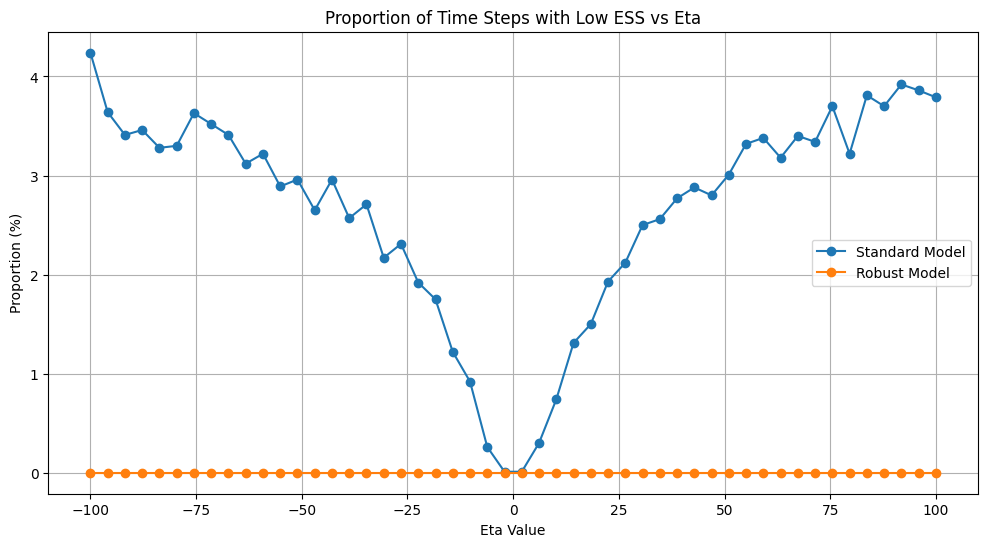

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(grid_eta, prop_std, marker='o', linestyle='-')
plt.plot(grid_eta, prop_rob, marker='o', linestyle='-')
plt.legend(['Standard Model', 'Robust Model'])
plt.title('Proportion of Time Steps with Low ESS vs Eta')
plt.xlabel('Eta Value')
plt.ylabel('Proportion (%)')
plt.grid(True)
plt.show()

In [14]:
from particles.collectors import Moments

## Simulation of the likelihood :

In [20]:
from simulate_likelihood import compute_logL_for_all, plot_simulated_likelihood

In [ ]:
filename = 'data/logL_grids_clean.pkl'

if os.path.exists(filename):
    print("Loading results") # To gain time on re-runs
    loaded_results = joblib.load(filename)
else:
    print("Computing results")
    res_sy, res_sx, res_a, res_b = compute_logL_for_all(50, data)
    loaded_results = {'sy': res_sy, 'sx': res_sx, 'a': res_a, 'b': res_b}
    joblib.dump(loaded_results, filename)

results_sy, results_sx, results_a, results_b = (
    loaded_results['sy'], loaded_results['sx'], loaded_results['a'], loaded_results['b']
)

Loading results


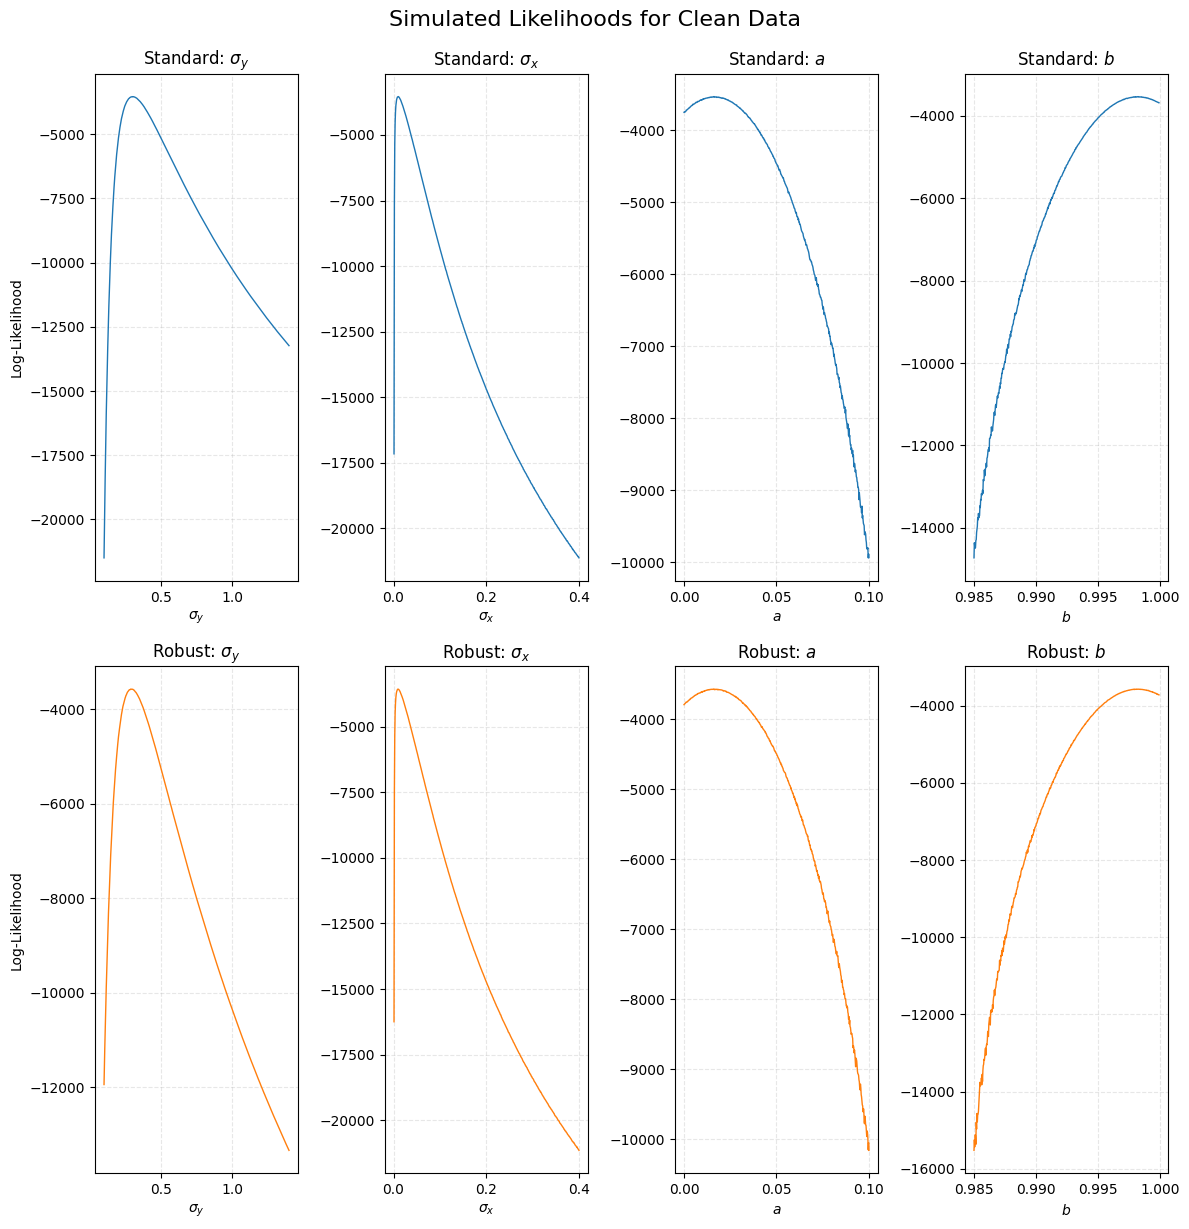

In [22]:
plot_simulated_likelihood(results_sy, results_sx, results_a, results_b, type='Clean Data')

In [ ]:
filename = 'data/logL_grids_contaminated.pkl'

if os.path.exists(filename):
    print("Loading results") # To gain time on re-runs
    loaded_results = joblib.load(filename)
else:
    print("Computing results")
    res_sy, res_sx, res_a, res_b = compute_logL_for_all(50, data)
    loaded_results = {'sy': res_sy, 'sx': res_sx, 'a': res_a, 'b': res_b}
    joblib.dump(loaded_results, filename)

results_sy, results_sx, results_a, results_b = (
    loaded_results['sy'], loaded_results['sx'], loaded_results['a'], loaded_results['b']
)

Loading results


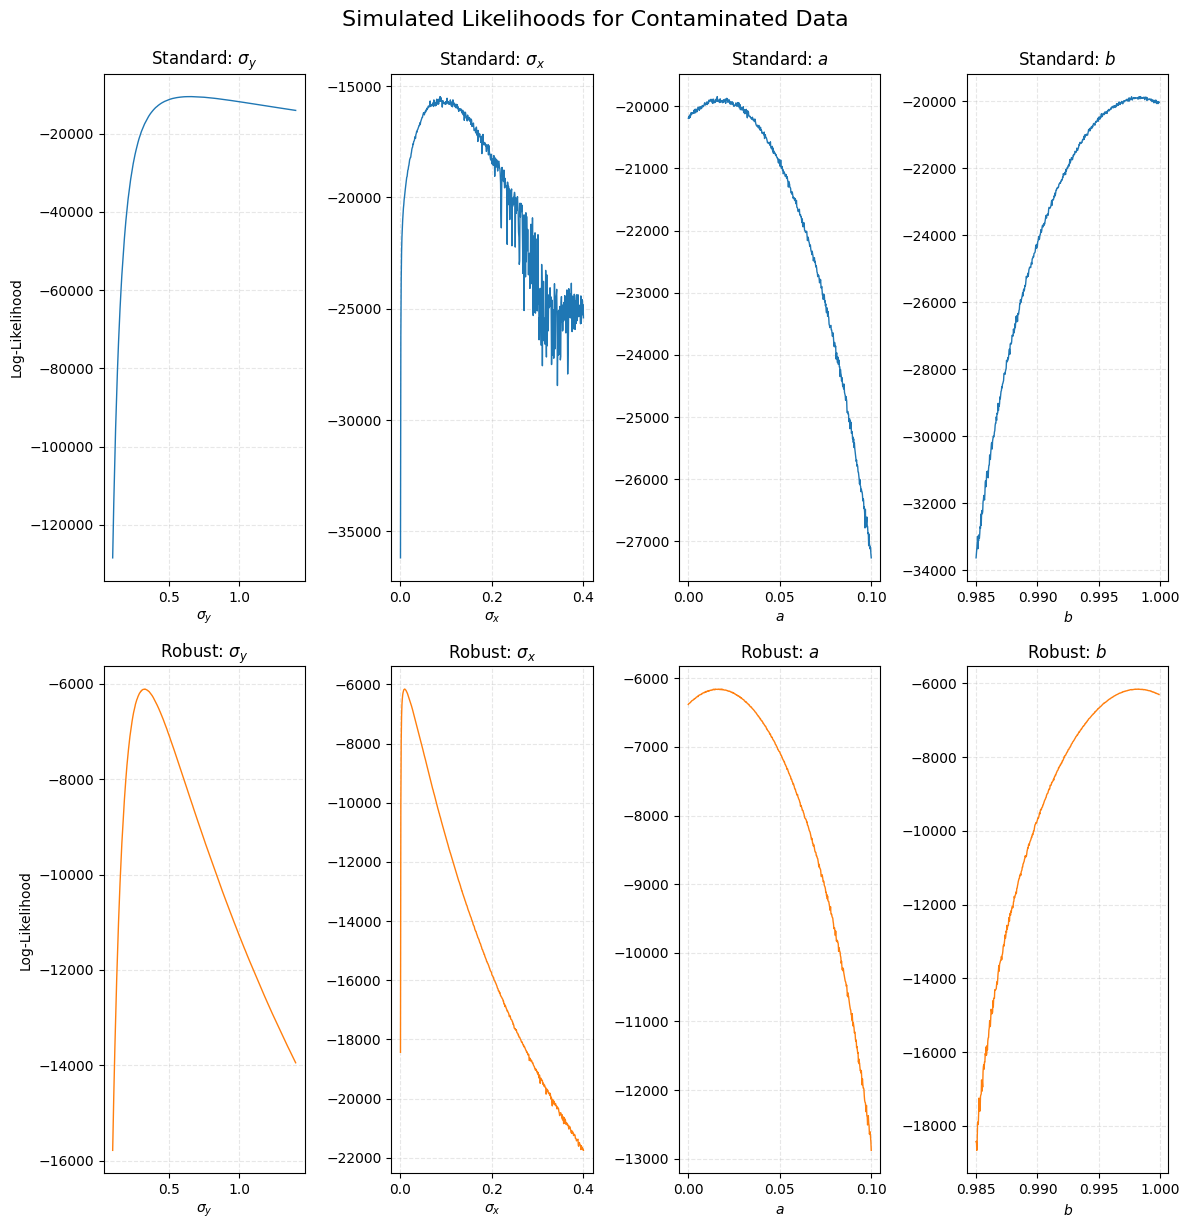

In [24]:
plot_simulated_likelihood(results_sy, results_sx, results_a, results_b, type='Contaminated Data')

# Daily Trading Volume (Natural Gaz real data from the paper)

In [ ]:
gaz_data_paper = pd.read_excel('data/FUTURE_NG1naturalgasRaw.xlsx')

In [31]:
gaz_data_paper.columns = gaz_data_paper.columns.get_level_values(0)
gaz_data = gaz_data_paper[gaz_data_paper['Volume'] > 0].dropna()
gaz_data['LogVolume'] = np.log(gaz_data['Volume'])

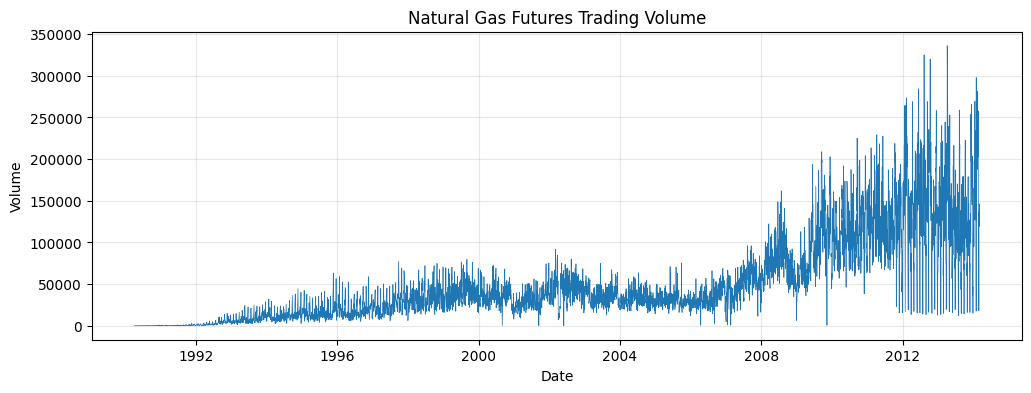

In [33]:
gaz_data = gaz_data.set_index('Date')
plt.figure(figsize=(12, 4))
plt.plot(gaz_data['Volume'], linewidth=0.5)
plt.title('Natural Gas Futures Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.show()

Train set: 4935 days
Test set: 1042 days


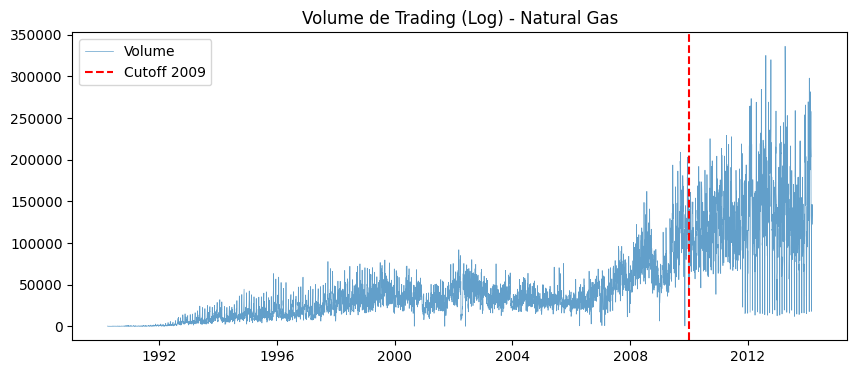

In [36]:
in_sample_mask = (gaz_data.index >= '1990-04-03') & (gaz_data.index <= '2009-12-31')
data_train = gaz_data.loc[in_sample_mask, 'LogVolume'].values
data_test = gaz_data.loc[~in_sample_mask, 'LogVolume'].values

print(f"Train set: {len(data_train)} days")
print(f"Test set: {len(data_test)} days")

# Visualisation rapide
plt.figure(figsize=(10, 4))
plt.plot(gaz_data.index, gaz_data['Volume'], linewidth=0.5, alpha=0.7, label='Volume')
plt.axvline(pd.to_datetime('2009-12-31'), color='r', linestyle='--', label='Cutoff 2009')
plt.title("Volume de Trading (Log) - Natural Gas")
plt.legend()
plt.show()

## Parameter estimation

In [37]:
from param_estim import run_parallel_optimizations, process_results, show_results, plot_boxplots


In [ ]:
filename = 'data/optimization_results_paper.csv'

if os.path.exists(filename):
    print("Loading optimization results") # To gain time on re-runs
    df_results_paper = pd.read_csv(filename)

else:
    # /!\ This cell may take a long time to run /!\
    results = run_parallel_optimizations(data_train, N=24, n_jobs=-1, c_robust=5.14) 
    df_results_paper = process_results(results)

In [ ]:
results_paper = show_results(df_results_paper)

In [ ]:
plot_boxplots(df_results_paper)

## Results

In [ ]:
from daily_trad_vol import get_forecasted_volumes, plot_results_comparison, plot_result_regression_comparison

In [ ]:
params_pf_paper = results_paper['Standard (c=1000)']
params_robpf_paper = results_paper['Robust (c=5.14)']

In [ ]:
results_pf_paper = get_forecasted_volumes(params_pf_paper, data_test)
results_robpf_paper = get_forecasted_volumes(params_robpf_paper, data_test)

In [ ]:
plot_results_comparison(data_test, results_pf_paper, results_robpf_paper)

# Daily Trading Volume (Natural Gaz real data from yfinance)

## Data Acquisition & preprocessing

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
gaz_data = yf.download('NG=F', start='2000-01-01', end='2026-01-01')

C:\Users\conta\AppData\Local\Temp\ipykernel_24116\3964145443.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gaz_data = yf.download('NG=F', start='2000-01-01', end='2026-01-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
gaz_data = gaz_data[['Volume']].copy()
gaz_data = gaz_data[gaz_data['Volume'] > 0].dropna()
gaz_data['LogVolume'] = np.log(gaz_data['Volume'])

Price,Volume,LogVolume
Ticker,NG=F,
count,6350.000000,6350.000000
mean,106798.013543,11.350244
std,64545.262068,0.772632
min,3.000000,1.098612
25%,48184.250000,10.782787
50%,103002.500000,11.542508
75%,150044.500000,11.918687
max,459196.000000,13.037232


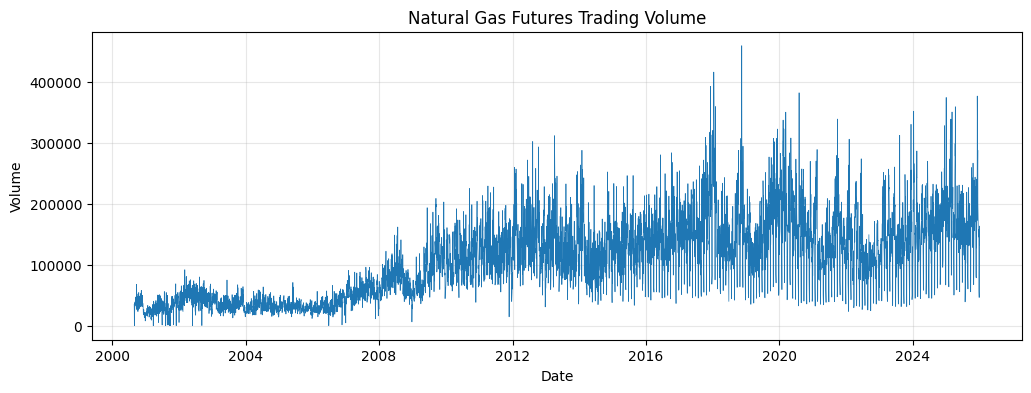

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(gaz_data['Volume'], linewidth=0.5)
plt.title('Natural Gas Futures Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.show()

Training set : 3086 days
Test set : 3264 days


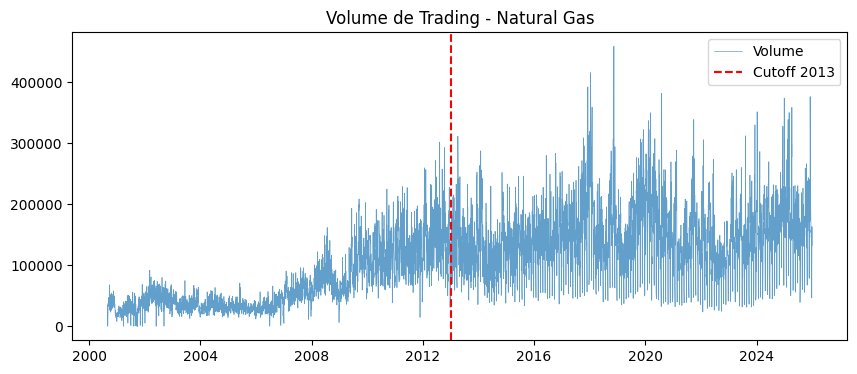

In [ ]:
in_sample_mask = (gaz_data.index >= '2000-08-30') & (gaz_data.index <= '2012-12-31')
data_train = gaz_data.loc[in_sample_mask, 'LogVolume'].values
data_test = gaz_data.loc[~in_sample_mask, 'LogVolume'].values

print(f"Training set : {len(data_train)} days")
print(f"Test set : {len(data_test)} days")

plt.figure(figsize=(10, 4))
plt.plot(gaz_data.index, gaz_data['Volume'], linewidth=0.5, alpha=0.7, label='Volume')
plt.axvline(pd.to_datetime('2012-12-31'), color='r', linestyle='--', label='Cutoff 2013')
plt.title("Volume de Trading - Natural Gas")
plt.legend()
plt.show()

## Parameters estimation

In [8]:
from param_estim import run_parallel_optimizations, process_results, show_results, plot_boxplots

In [ ]:
filename = 'data/optimization_results.csv'

if os.path.exists(filename):
    print("Loading optimization results") # To gain time on re-runs
    df_results = pd.read_csv(filename)

else:
    # /!\ This cell may take a long time to run /!\
    results = run_parallel_optimizations(data_train, N=8, n_jobs=-1, c_robust=5.14) 
    df_results = process_results(results)

Loading optimization results


In [10]:
results = show_results(df_results)

--- Robust (c=5.14) ---
   Log-Likelihood : -618.10
   sigma_y        : 0.2245
   b              : 0.9917
   sigma_x        : 0.0070
   a              : 0.0920
------------------------------
--- Standard (c=1000) ---
   Log-Likelihood : -2191.11
   sigma_y        : 0.4630
   b              : 0.9949
   sigma_x        : 0.0058
   a              : 0.0571
------------------------------


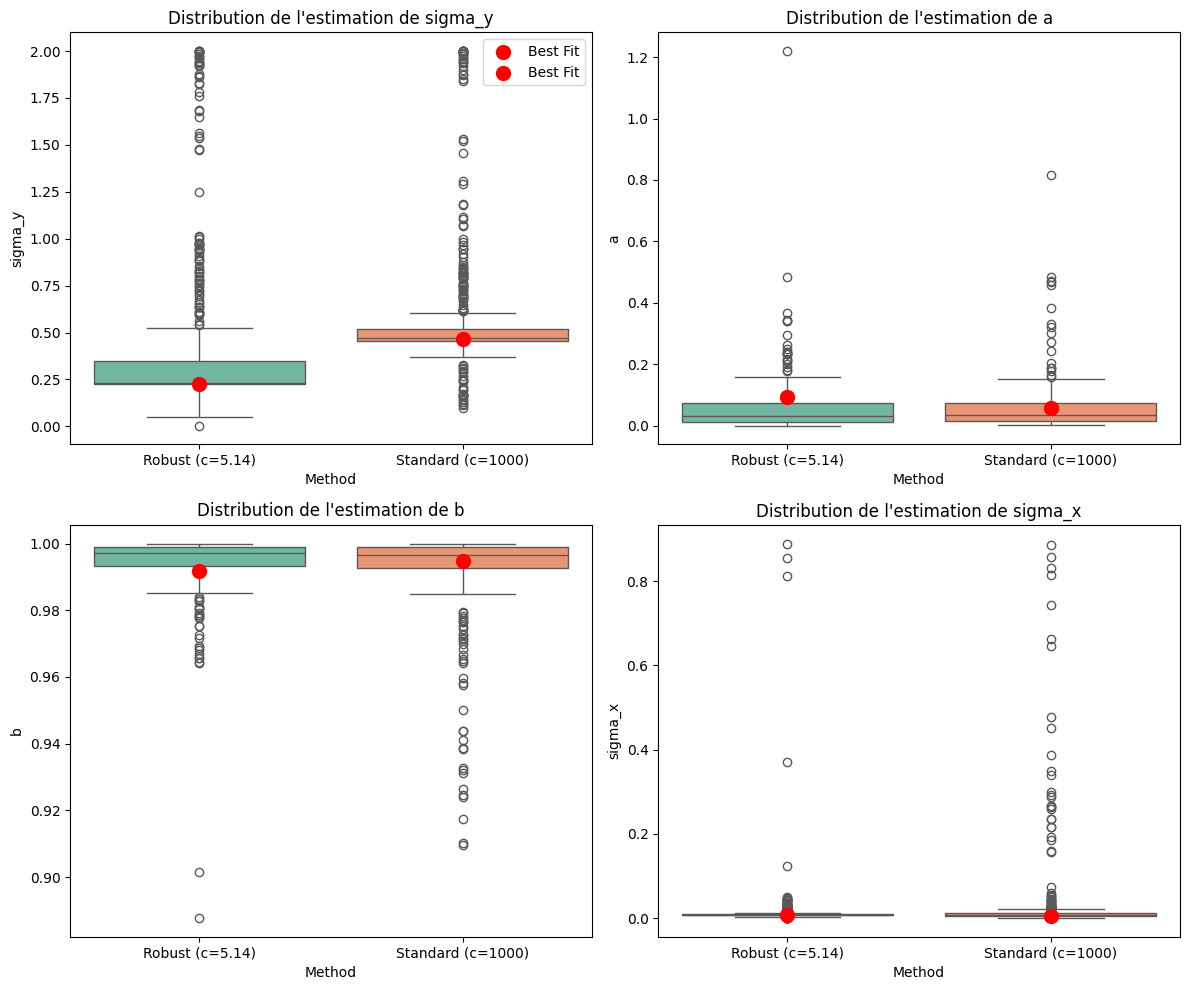

In [11]:
plot_boxplots(df_results)

## Results 

In [12]:
from daily_trad_vol import get_forecasted_volumes, plot_results_comparison, plot_result_regression_comparison

In [13]:
params_pf = results['Standard (c=1000)']
params_robpf = results['Robust (c=5.14)']

In [14]:
results_pf = get_forecasted_volumes(params_pf, data_test)
results_robpf = get_forecasted_volumes(params_robpf, data_test)

OUT-OF-SAMPLE PREDICTION METRICS COMPARISON

Metric               Standard PF          Robust PF           
------------------------------------------------------------
R² Score             0.0267               0.2177              
MSE                  3133551459.52        2518653628.10       
MAE                  43058.85             38380.14            

Improvement with Robust PF:
  - R² improvement: 0.1910 (714.9%)
  - MSE reduction: 614897831.42 (19.6%)
  - MAE reduction: 4678.71 (10.9%)


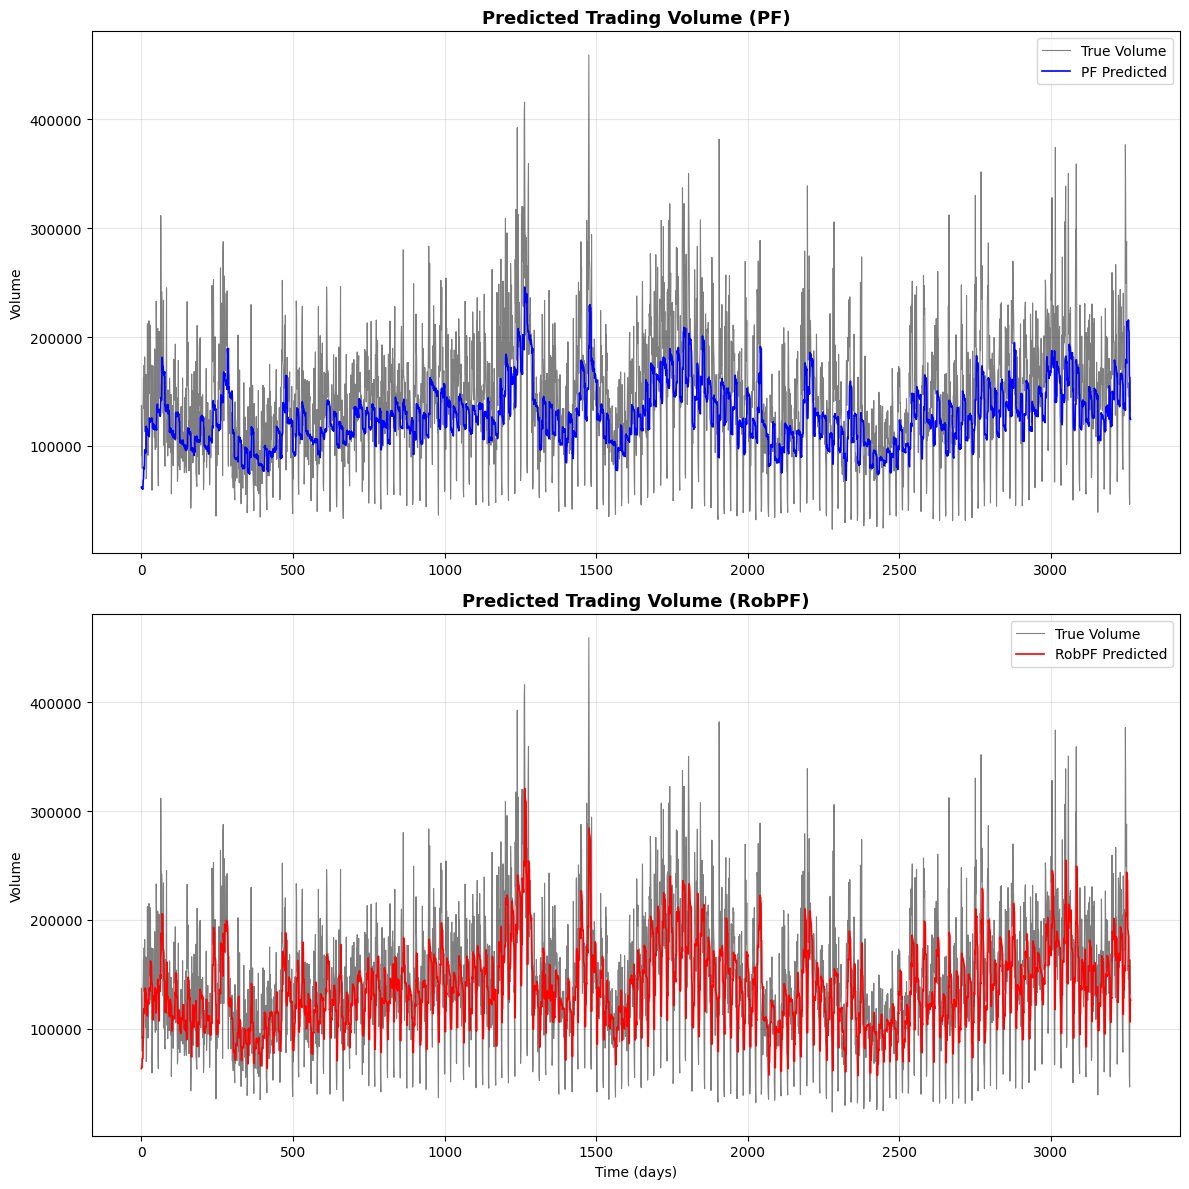

In [16]:
plot_results_comparison(data_test, results_pf, results_robpf)